# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [13]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 
I think that PCA will highlight the products that are sold the most, for example fresh, milk and groceries may be combined into a single (or smaller number of) features.
For ICA, I think it may start to find new features that highlight the different customer types earlier on based on their spending patterns. It may identify those that purchase different types of products more often than other types of products.


###PCA

In [14]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 
Variance drops off significantly after 2 dimensions, therefore I would choose to use 2 dimensions for my analysis.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 
I'd guess that the dimensions represent the relative importance of each of the features, so the first 2 features are the most important in determing which features I would use to train on. After that, it appears that training using the 3rd, 4th, 5th and 6th features will not make much improvement to the accuracy of the algorithm.
These 2 dimensions will likely give an indication of the type of customer, so which is a larger customer and which is a smaller customer.

The vectors above represent how each of the principle components identified correlate to the features in the dataset.  From my testing, these values were determed for the 2 dimensions identified above:

Dimension 1:
[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
This shows that the this principle component (PC1) is most heavily correlated with fresh food, and in particular this is a negative correlation reflecting that this is related to not selling as much fresh food.  The 2nd correlation is with milk, and again this relates to not selling as much milk. 

Dimension 2:
[-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
This dimension shows that it correlates most significantly with selling grocery, milk and detergents/paper.  It also has a negative correlation with fresh.

###ICA

In [15]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing
data_centered = preprocessing.scale(data)
#ica = FastICA().fit(data_centered)
ica = FastICA(n_components = data.shape[1], random_state = 3).fit(data_centered)
df = pd.DataFrame(ica.components_, columns = data.columns)

# Print the independent components
print df
#print ica.components_

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.010884 -0.001081  0.007352  0.054062         -0.002547     -0.016882
1 -0.002023 -0.072265  0.056706  0.001636         -0.017840      0.016877
2 -0.002482  0.012466 -0.071079 -0.001292          0.015845      0.005594
3  0.004932  0.001578  0.005578  0.002395         -0.002397     -0.050898
4  0.003286 -0.019221 -0.107596  0.007268          0.133039      0.016032
5  0.050274 -0.006585 -0.007647 -0.003219          0.011731     -0.002652


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer:
Each vector relates to how each feature in the data set contributes to the original sources (so the customer segments) that created this data. These components can be used to start to determine the different customer segments. The default settings assume that there are the same number of sources (components) as features and therefore the matrix can be used to group the customers into 6 types based on their propensity to purchase the different types of products.

Using this data, we can see that:

Source 0: [-0.010884 -0.001081  0.007352  0.054062  -0.002547  -0.016882]
This source is related to selling more grocery and frozen and less fresh, milk, detergents/paper and delicatessen. Frozen is the most important in this source.

Source 1: [1 -0.002023 -0.072265  0.056706  0.001636         -0.017840      0.016877]
This source is related to selling more grocery, frozen and delicatessen, and less milk. Milk and grocery are the highest importance in this source.

Source 2: [-0.002482  0.012466 -0.071079 -0.001292          0.015845      0.005594]
This source is related to selling more milk, detergents/paper and delicatessen. However the biggest influence relates to less grocery.

Source 3: [0.004932  0.001578  0.005578  0.002395         -0.002397     -0.050898]
This source is related to selling more fresh, milk, grocery and frozen.  Fresh and grocery are the most important products in this source.

Source 4: [0.003286 -0.019221 -0.107596  0.007268          0.133039      0.016032]
This source is related to not selling milk or grocey, but selling fresh and detergents/paper.  Detergents/paper and grocery are the most important here.

Source 5: [0.050274 -0.006585 -0.007647 -0.003219          0.011731     -0.002652]
This source relates to slling fresh (primarily) and detergents/paper. 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

K Means clustering works if the number of clusters in the data is already known.  It also scales well to large numbers of samples and has been demonstrated to work in many different fields.  Because of the known number of clusters, K Means is often very fast in determining which sample is in which cluster. KMeans clusters are hard clusters, as in a data point exists in a single cluster only.

Gaussian Mixture Models typically identity the dominant patterns well.  They also have well-studied statistical inference models available, and it's also possible to determine the density of each cluster. These models also can determine the covariance of different features in the data.  GMM clusters can also be soft clusters whereby a point in the data could conceivably be part of multiple clusters.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [16]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

### Common Functions
These are the common functions needed to graph the clustering algorithm.  They are here so that I can run multiple iterations and collate the results in one place


In [17]:
# Plot the decision boundary by building a mesh grid to populate a graph.
#x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
#y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
#hx = (x_max-x_min)/1000.
#hy = (y_max-y_min)/1000.
#xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
#Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [18]:
# Put the result into a color plot
#Z = Z.reshape(xx.shape)
#plt.figure(1)
#plt.clf()
#plt.imshow(Z, interpolation='nearest',
#           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#           cmap=plt.cm.Paired,
#           aspect='auto', origin='lower')

#plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
#plt.scatter(centroids[:, 0], centroids[:, 1],
#            marker='x', s=169, linewidths=3,
#            color='w', zorder=10)
#plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
#          'Centroids are marked with white cross')
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
#plt.xticks(())
#plt.yticks(())
#plt.show()

In [34]:
def plot_clusters(reduced_data, centroids):
    # Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
  
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    

In [35]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
def reduce_data_with_pca(data, n_components = 2):
    reduced_data = PCA(n_components).fit(data).transform(data)
    return reduced_data


In [49]:
reduced_data = reduce_data_with_pca(data, n_components = 2)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [70]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=2).fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [71]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids

[[  4175.31101293   -211.15109304]
 [-24088.33276689   1218.17938291]]


Now plot the results for this cluster

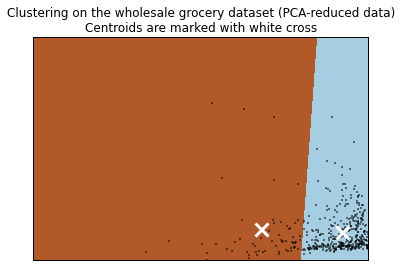

In [72]:
plot_clusters(reduced_data, centroids)

In [58]:
# Now try to calculate a silhouette score for this cluster
from sklearn import metrics
labels = clusters.labels_
metrics.silhouette_score(reduced_data, labels, metric='euclidean')

0.52501101134301476

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: The central objects in each cluster are the means for each customer in the cluster.  For example, if we assume that the 2 clusters are "large" and "small" customers of the wholesaler, then each of the central objects is the mean of all of those types of customers.

### Analysing the data with additional clusters

1) In this scenario, we use K Means with 3 clusters

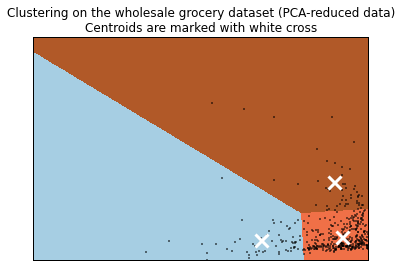

0.52331800047957266

In [62]:
clusters = KMeans(n_clusters=3).fit(reduced_data)
centroids = clusters.cluster_centers_
plot_clusters(reduced_data, centroids)

# Now try to calculate a silhouette score for this cluster
labels = clusters.labels_
metrics.silhouette_score(reduced_data, labels, metric='euclidean')

From this clustering approach, we can see that the heavy clustering of customers in the bottom right hand corner is part of a single cluster, and the more outlying data points are seperated into 2 additional clusters.  Visually this seems to fit better with the data.


####Analysis using silhouettes
As a final check of the clustering, I have used silhouettes to validate that the optimal clustering approach of ... doesn't show clusters with below average silhouette scores. Note that we are doing this on the full data and not the reduced data set.

2) Using GMM

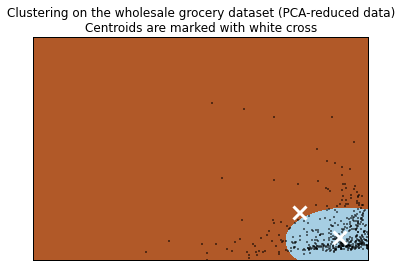

0.50273142992147424

In [73]:
gmm_model = GMM(n_components=2) 
clusters = gmm_model.fit(reduced_data)
centroids = clusters.means_
plot_clusters(reduced_data, centroids)

# Now try to calculate a silhouette score for this cluster
labels = gmm_model.fit_predict(reduced_data)
metrics.silhouette_score(reduced_data, labels, metric='euclidean')

This clustering provides a good fit to the higher-density customers in the bottom right of the graph, but leaves the remaining customers as a single cluster.  This graph uses n_components = 2 as we have reduced the data to 2 components at this point in time.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 
As a business owner, I would look to use a mix of all 3 techniques.

initially use the KMeans clustering algorithm to give me the best insights into the data.  This is because I can clearly see the different clusters I have and how they relate to my individual customers. 

In the future, I may start to use PCA to determine which are the most influential product categories between these 2 groups. I could also look to use ICA to determine if there were a deeper level of information that is not immediately evident in this data.

**9)** How would you use that technique to help the company design new experiments?

Answer: 
I would start to run experiments on each type of customer, for example using the most influential product categories first and seeing how changes in either would change the amount of product sold.

**10)** How would you use that data to help you predict future customer needs?

Answer: 
Effectively I would look for changes in the data over time (trends).  Examples could be:
- I could look at whether any customers started to move towards the boundary between the segments, as this may suggest they are growing (or not!).
- I could also look at whether the mix of products changes, so for example whether another category starts to gain traction with a set of customers. 